In [2]:
import pandas as pd
import sklearn
#taller numero 2



Ajustar un modelo para el conjunto de datos. El conjunto de datos contiene información de una
población con la cual se intenta predecir si puede o no cobrar más de 50.000 dólares anuales.

In [3]:
columnas=['edad','clase_de_trabajo','cantidad_personas','educacion',
            'anios_de_estudio','estado_civil','ocupacion','relaciones','raza',
            'sexo','ganancia_capital','perdida_de_capital','horas_por_semana','pais','ganancia']
# Load the Census dataset
data = pd.read_csv("/home/usm/Descargas/Practica Arboles/datos/adult.data",names=columnas, na_values=['?'] )

display(data)


FileNotFoundError: [Errno 2] File b'/home/usm/Descargas/Practica Arboles/datos/adult.data' does not exist: b'/home/usm/Descargas/Practica Arboles/datos/adult.data'

In [4]:

#datos faltantes
data=data.dropna(axis=0)
display(data.isnull().sum())

NameError: name 'data' is not defined

In [5]:
data_complete=data.drop(labels=['cantidad_personas'],axis=1)
#display(data_complete.describe())
#display(data_complete.corr())
#display(data_complete.dtypes)

#tamaño del conjunto de datos
n_records=len(data_complete)
n_most_50=len(data_complete[data_complete['ganancia']=='>50K'])
#n_most=len(data_complete['ganancia']=='<=50k')

print("total:",str(n_records))
print(">50",n_most_50)

NameError: name 'data' is not defined

In [6]:
#pasar las variables categoricas a dummies con funcion ya hecha
def function_dummies(df):
    df_dummies=df
    colnames=df.columns
    for c in colnames:
        if df[c].dtypes=='object':
            col=  pd.get_dummies(df[c])
            df_dummies[c+"_"+col.columns]=col
            df_dummies = df_dummies.drop(labels=[c],axis=1)
    return (df_dummies)

Y=data_complete['ganancia']
X=data_complete.drop(labels=['ganancia'],axis=1)
X_dummies=function_dummies(X)
#muestra los 5 primeros
display(X_dummies.head(5))
Y=Y.str.replace('<=50K','1')
Y=Y.replace('>50K','0')


NameError: name 'data_complete' is not defined

Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30
(genere una semilla aleatoria e indique el valor de la semilla en el software que utilizó).
Indique que cantidad de casos quedaron para cada ambiente.

In [7]:
from sklearn.model_selection import train_test_split
#random_state=0 quiere decir que guarda el mismo conjunto aleatorio
#test_size da el 30% lo oculta para hacer pruebas y el 70% va hacer de validacion
X_train,X_test,y_train,y_test=train_test_split(X_dummies,Y,test_size=0.3,random_state=0)

print(">50 train", y_train[y_train=='1'].count())
print("<=50 train", y_train[y_train=='0'].count())

#print(">50 train", y_test[y_test=='1'].count())
#print("<=50 train", y_test[y_test=='0'].count())

NameError: name 'X_dummies' is not defined

In [8]:
# Import train_test_split
from sklearn import tree
#arbol de 4 niveles max_depth=4
modelo=tree.DecisionTreeClassifier(max_depth=4,criterion='entropy')

#entrena la variable
modelo.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [9]:
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 
#pip install graphviz
#pip install pydotplus
dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

NameError: name 'X_train' is not defined

Calcular la perfomarnce y el AUC y el gráfico ROC en entrenamiento y validación
indicando también el total de casos de cada una de las clases.

In [10]:
#Esta parte es para validar bajo la metrica
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


#predict test
y_pred_test=modelo.predict(X_test)
#predict train
#Que tanto predice los datos que miro
y_pred_train=modelo.predict(X_train)

display('Test:',confusion_matrix(y_test,y_pred_test))
tn,fp,fn,tp=confusion_matrix(y_test,y_pred_test).ravel()
print("verdaderos positivos",tp)
print("verdadetos negativos",tn)
print("falsos positivos",fp)
print("falsos negativos",fn)
ac=(tp+tn)/(tp+tn+fn+fp)
print("performance", ac)

#forma resumida de lo anterior
print("accuracy test",accuracy_score(y_test,y_pred_test))
print("accuracy train",accuracy_score(y_train,y_pred_train))



'Test:'

array([[1178, 1107],
       [ 369, 6395]])

verdaderos positivos 6395
verdadetos negativos 1178
falsos positivos 1107
falsos negativos 369
performance 0.8368880539286109
accuracy test 0.8368880539286109
accuracy train 0.8416141713636148


In [11]:
#genera una matriz de 2*2 puesto que tiene 2 clases
probs_test= modelo.predict_proba(X_test)



data_set_test=X_test.copy()
display(data_set_test.head(5))

#va agregar una columna
data_set_test['predicho']=y_pred_test
data_set_test['predicho_prob_1']=probs_test[:,1]
data_set_test['predicho_prob_0']=probs_test[:,0]
data_set_test['real']=y_test

display(data_set_test.head(10))




,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Portugal,pais_Puerto-Rico,pais_Scotland,pais_South,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia
2135,44,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15639,21,10,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
29059,36,10,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
27523,30,11,0,0,49,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9280,42,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


,edad,anios_de_estudio,ganancia_capital,perdida_de_capital,horas_por_semana,clase_de_trabajo_Federal-gov,clase_de_trabajo_Local-gov,clase_de_trabajo_Private,clase_de_trabajo_Self-emp-inc,clase_de_trabajo_Self-emp-not-inc,...,pais_Taiwan,pais_Thailand,pais_Trinadad&Tobago,pais_United-States,pais_Vietnam,pais_Yugoslavia,predicho,predicho_prob_1,predicho_prob_0,real
2135,44,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,0.986046,0.013954,1
15639,21,10,0,0,20,0,0,1,0,0,...,0,0,0,1,0,0,1,0.986046,0.013954,1
29059,36,10,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,1
27523,30,11,0,0,49,0,0,0,0,1,...,0,0,0,1,0,0,1,0.926650,0.073350,1
9280,42,10,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,1,0.657381,0.342619,1
21598,24,9,0,0,40,0,0,1,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,1
28780,21,10,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0.986046,0.013954,1
13383,32,13,0,0,45,0,0,0,1,0,...,0,0,0,1,0,0,0,0.352969,0.647031,1
11015,35,9,0,0,60,0,0,1,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,0
3180,30,9,0,0,40,0,1,0,0,0,...,0,0,0,1,0,0,1,0.657381,0.342619,0


Selecciones el 25% de los individuos en el ambiente de validación de acuerdo a la
siguiente lógica. Entregue los resultados indicados:
a. Al azar e indique la cantidad de individuos que cobran más de 50.000 dólares.


In [12]:
X_test_75, X_25, y_test_75, y_25 = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print ("total 25%",y_25.count())
print(">50k test 25% azar",y_25[y_25=='1'].count())

total 25% 2263
>50k test 25% azar 1715


b. Utilizando el modelo desarrollado en el punto 1.1.2 e indique la cantidad de
individuos que cobran más de 50.000 dólares.

In [13]:
#usando modelo

y_25_modelo=data_set_test.sort_values(['predicho_prob_1'], ascending=[False])[1:y_25.count()]
print(">50k test 25% modelo",len(y_25_modelo[y_25_modelo['real'] == '1']))

>50k test 25% modelo 2216


[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


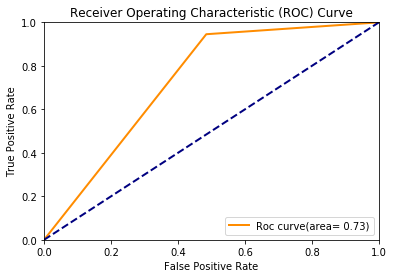

0.7304912932023961

In [15]:
#crea la curva de roc para este modelo
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

def my_roc(y_real,y_pred):
    y_real=label_binarize(y_real,classes=['0','1'])
    y_pred=label_binarize(y_pred,classes=['0','1'])
    print(y_real)
    fpr,tpr,_=roc_curve(y_real.ravel(),y_pred.ravel())
    roc_auc=auc(fpr,tpr)
    
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='Roc curve(area= %0.2f)'% roc_auc)
    #la siguiente linea establece los ejes
    plt.plot([0, 1], [0, 1], color='navy',lw=lw, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc
my_roc(y_test,y_pred_test)


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer
#Es mejor pasarle el area bajo la curva

param={'criterion':['entropy','gini'],
       'splitter':['random','best'],
       'max_depth':[3,5,10,20,],
       'min_samples_split':[100,500,3000],
       #'min_samples_leaf':[100,300,1000],
      # 'min_weight_fraction_leaf':[0,1],
       #'max_features':[None,'auto','sqrt','log2'],
       #'random_state':[0,1,2],
       #'max_leaf_nodes':[100,500,1000],
       #'min_impurity_decrease':[0,0.4],
       #'min_impurity_split':[0,0.4],
       'class_weight':['balanced',None]
      }
auc_scorer=make_scorer(auc)
#esto es para buscar el mejor modelo
grid = GridSearchCV(modelo, param, cv=4,n_jobs=-1,scoring=auc_scorer)
y_bin_train = label_binarize(y_train, classes=[0, 1])

#ENTREGA LOS MEJORES PARAMETROS PARA ENTRENAR
grid_ejec = grid.fit(X_train, y_bin_train.ravel())

[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


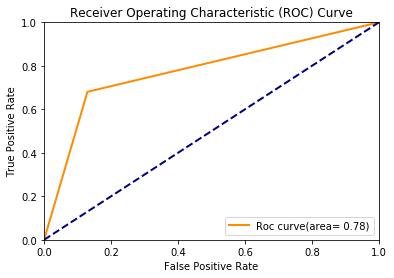

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [39]:
mejor_modelo=grid_ejec.best_estimator_

y_mejor_modelo=mejor_modelo.predict(X_test)

#AQUI ENTRENA AL MODELO CON LOS MEJORES MODELOS

mejor_modelo=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')
mejor_modelo.fit(X_train,y_train)
my_roc(y_test,mejor_modelo.predict(X_test))
mejor_modelo


In [42]:
 def my_roc(y_real,y_pred):
    y_real=label_binarize(y_real,classes=['0','1'])
    y_pred=label_binarize(y_pred,classes=['0','1'])
    print(y_real)
    fpr,tpr,_=roc_curve(y_real.ravel(),y_pred.ravel())
    roc_auc=auc(fpr,tpr)
    
    plt.figure()
    lw=2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='Roc curve(area= %0.2f)'% roc_auc)
    #la siguiente linea establece los ejes
    plt.plot([0, 1], [0, 1], color='navy',lw=lw, linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc


from sklearn.model_selection import StratifiedKFold
#PARTE EN 4 PARTES n_splits=4
cv = StratifiedKFold(n_splits=4,shuffle=False)
#vector para areas bajo las curvas
aucs=[]

#este ciclo lo q hace es tomar de cada una de las 4 partes lo de entrenamiento y test

for train,test in cv.split(X_train,y_train):
    #print(X_train.iloc[train].head(5))
    m=tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')
    m.fit(X_train.iloc[train],y_train.iloc[train])
    aucs.append(my_roc(y_train.iloc[train]),)
    
   


       edad  anios_de_estudio  ganancia_capital  perdida_de_capital  \
24256    31                 9                 0                   0   
7979     48                14                 0                   0   
12814    40                13                 0                   0   
8829     46                 9                 0                   0   
12207    33                14             15024                   0   

       horas_por_semana  clase_de_trabajo_Federal-gov  \
24256                40                             0   
7979                 40                             0   
12814                40                             0   
8829                 60                             0   
12207                40                             0   

       clase_de_trabajo_Local-gov  clase_de_trabajo_Private  \
24256                           0                         1   
7979                            0                         1   
12814                           0        